# 20.11.2024 - Wiederholung Polynomielle Regression + Statistische Basics mit Python und Numpy Basics
---
Wir werden das Thema *Polynomielle Regression*  wiederholenung und mit einigen Zusatzinformationen zu Polynomen vervollständigen.

Danach beschäftigen wir uns mit einigen grundlegen *statistischen Kennzahlen*. Diese können mit grundlegenden Python Programmiermethoden und/oder mit Numpy Methoden bestimmt werden.

* Zur Bearbeitung der Aufgaben können Sie benötigte Informationen zu Python-Befehlen und zu KI relevanten Bibliotheken (numpy, scikit, pandas) aus allen verfügbaren Quellen beziehen. Die meisten findet man natürlich über eine Suche im Internet, oder durch die Nutzung von KI chat-Systemen selbst.
Ein gutes Tutorial für den Start findet sich  z.B. hier: https://www.python-kurs.eu/numerisches_programmieren_in_Python.php

## Phase 1: Wiederholung - Polynomielle Regression

### Idee

Die *polynomielle Regression* ist eine Erweiterung der linearen Regression, bei der die Beziehung zwischen *unabhängigen* und *abhängigen* Variablen (d.h. zwischen *features* und *labels*) durch ein Polynom höherer Ordnung modelliert wird. Sie eignet sich besonders für nichtlineare Zusammenhänge. Typische Anwendungsbereiche sind  komplexe Datenmuster, die mit einer einfachen Geraden nicht erfasst werden können.

### Wiederholung von Aufgabe 3 vom letzten Unterricht: Vorhersage von Fahrradverkäufen mit Polynomialer Regression

Ein Fahrradgeschäft hat die Verkaufszahlen für die letzten 12 Monate aufgezeichnet. Die Verkaufszahlen folgen einem nicht-linearen Trend, da sie saisonalen Schwankungen unterliegen. Visualisieren zu erst die Datenpunkte, bevor sie das polynomielle Regressionsmodell erstellen und plotten. Anhand der Datenpunkte erkennt man gut das nichtlineare Muster.

Erstellen Sie dann mit sklearn ein polynomiales Regressionsmodell, um zukünftige Verkäufe vorherzusagen.
Nutzen Sie eine polynomiale Regression, um die Verkaufszahlen für den 13. Monat vorherzusagen und visualisieren Sie das Ergebnis.

| Monat	| Verkaufszahlen |
|--------|--------|
|1 |	100
|2 |	150
|3 |	200
|4 |	250
|5 | 	400
|6 |	600
|7 |	800
|8 | 	850
|9 |	700
|10 |	600
|11 |	450
|12 |	300

In [ ]:
# Vorhersage von Fahrradverkäufen mit Polynomialer Regression

#  1. Benötigte Python Pakete importieren
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Verkaufsdaten
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).reshape(-1, 1)  # Monate
y = np.array([100, 150, 200, 250, 400, 600, 800, 850, 700, 600, 450, 300])  # Verkaufszahlen

# Polynomiale Features erstellen (z.B. Grad 3 für Nicht-Linearität)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Lineares Regressionsmodell auf die polynomiellen Features anwenden (hier wird das Polynom berechnet)
model = LinearRegression()
model.fit(X_poly, y)

# Vorhersage für den 13. Monat
X_Monat13 = np.array([[13]])
X_Monat13_poly = poly.transform(X_Monat13)
vorhersage = model.predict(X_Monat13_poly)
print(f"Vorhergesagte Verkaufszahlen für den 13. Monat: {vorhersage[0]}")


# Visualisierung der Daten und des polynomiellen Modells
X_linspace = np.linspace(1, 13, 100).reshape(-1, 1)
X_linspace_poly = poly.transform(X_linspace)
y_linspace_pred = model.predict(X_linspace_poly)

plt.scatter(X, y, color='red', label='Datenpunkte')
# plt.plot(X_linspace, y_linspace_pred, label='Polynomiale Regression (Grad 3)', color='blue')
plt.xlabel('Monat')
plt.ylabel('Verkaufszahlen')
plt.title('Polynomiale Regression für Fahrradverkäufe')
plt.legend()
plt.grid(True)
plt.show()


### Ein Ausschnitt aus der Welt der Polynome

Bevor wir uns den Python Code zur Erzeugung des Regressionspolynoms im Detail durchgehen, betrachten wir erst einmal was genau Polynome eigentlich sind.  

- **Grad 0 (Konstantenpolynom)**:
  $$
  P(x) = c
  $$
  Ein Polynom vom Grad 0 ist ein konstantes Polynom, wobei $ c $ eine Konstante ist.

- **Grad 1 (Lineares Polynom)**:
  $$
  \begin{aligned}
  P(x) &= ax + b
  \end{aligned}
  $$
  Ein Polynom vom Grad 1 beschreibt eine Gerade, wobei $ a $ die Steigung und $ b $ der Achsenabschnitt ist.

- **Grad 2 (Quadratisches Polynom)**:
  $$
  \begin{aligned}
  P(x) &= ax^2 + bx + c
  \end{aligned}
  $$
  Ein Polynom vom Grad 2 ist ein Parabelpolynom, wobei $ a \neq 0 $ sein muss.

- **Grad 3 (Kubisches Polynom)**:
  $$
  \begin{aligned}
  P(x) &= ax^3 + bx^2 + cx + d
  \end{aligned}
  $$
  Ein Polynom vom Grad 3 beschreibt eine Kurve, die bis zu zwei Extrempunkte haben kann.

- **Grad 4 (Polynom vom Grad 4)**:
  $$
  \begin{aligned}
  P(x) &= ax^4 + bx^3 + cx^2 + dx + e
  \end{aligned}
  $$
  Ein Polynom vom Grad 4 hat bis zu drei Extrempunkte und kann eine Wellenform aufweisen.

Die Werte $a, b, c, d, e$ aus obigen Poynomformeln nennt man die *Koeffizienten* des Polynoms. Der Grad und die Koeffizienten definieren das Polynom.

Eine etwas allgemeinere Darstellung, z.B. für das Polynom 4. Grades, sieht wie folgt aus: 
$$
P(x) = a_{4}x^4 + a_{3}x^3 + a_{2}x^2 + a_{1}x + a_{0}. 
$$
Noch allgemeiner formuliert hat jedes Polynom der Ordnung $n$ (mit $n \in \mathbb{N}_0$) die Darstellung 
$$
P(x) = \sum_{i=0}^n a_{i}x^i.
$$

#### Beispiele für Polynome unterschiedlichen Grades

![Polynom vom Grad 0](./PythonGrundlagen_005_Bilder/Graph_Polynom_Grad0.png)
![Polynom vom Grad 1](./PythonGrundlagen_005_Bilder/Graph_Polynom_Grad1.png)
![Polynom vom Grad 2](./PythonGrundlagen_005_Bilder/Graph_Polynom_Grad2.png)
![Polynom vom Grad 3](./PythonGrundlagen_005_Bilder/Graph_Polynom_Grad3.png)
![Polynom vom Grad 4](./PythonGrundlagen_005_Bilder/Graph_Polynom_Grad4.png)

#### -> Mit diesen Eindrücken von Polynomen, geht es jetzt zurück zur Python Implementierung der Polynomiellen Regression!

### 1. Aufgabe: Mit verschiedenen Polynomen experimentieren

In folgender Aufgabe geht es um ein Szenario mit Kundenbesuchen über den Tag hinweg. In den Daten liegt allerdings Rauschen (zufällige Variationen) vor. Dies simuliert die Realität, in der die Daten nicht perfekt einer glatten Kurve folgen.

Erstellen Sie Numpy arrays mit den untenstehenden Daten.
Verwenden Sie sklearn, um eine lineare und eine polynomielle Regression durchzuführen. Experimentieren Sie dabei mit verschiedenen Polynomgraden. Visualisieren Sie die Ergebnisse mit Matplotlib. 

| Stunde | Kundenbesuche |
|--------|---------------|
| 7      | 8            |
| 8      | 15           |
| 9      | 30           |
| 10     | 60           |
| 11     | 95           |
| 12     | 110          |
| 13     | 94           |
| 14     | 75           |
| 15     | 40           |
| 16     | 50           |
| 17     | 15           |
| 18     | 7            |

In [ ]:
# --- Polynomielle Regression: Kundenbesuche waehrend eines Tages ---

# Import benötigter Bibiliotheken
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Numpy arrays fuer Daten
x = np.array([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]).reshape(-1, 1)
y = np.array([8, 15, 30, 60, 95, 110, 94, 75, 40, 50, 15, 7])

# Plot der originalen Datenpunkte
plt.scatter(x , y, color = 'blue', label = 'Ursprungsdatensatz')

# Features erweitern auf Features für Polynom x. Grades
degree = 4
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x)

# Lineare Regression auf die polynomiell erweiterten Daten anwenden
model = LinearRegression()
model.fit(x_poly, y)

# Polynomdaten zum Plotten berechnen
x_range = np.linspace(7,18,100).reshape(-1,1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

# Plotten des Polynoms
plt.plot(x_range, y_range_pred, color='green',label='Polynomielle Regression')

plt.xlabel('Stunde')
plt.ylabel('Kundenbesuche')
plt.title('Kundenbesuche im Tagesverlauf')

plt.legend()

plt.grid(True)

plt.show()

## Phase 2: Statistische Werte und zurück zu Python und Numpy Basics

### 2. Aufgabe: Statistische Datenanalyse und Visualisierung
Erstelle ein Pandas-DataFrame, das die täglichen Temperaturen (in °C) über einen Zeitraum von 30 Tagen enthält. Die Temperaturen sollen zufällig generiert werden (zwischen 15°C und 30°C).  Zeichne anschließend mit Matplotlib ein Liniendiagramm, das die Temperaturentwicklung über die Tage hinweg zeigt.

Berechne mit NumPy den Durchschnitt, die Standardabweichung und die Varianz der Temperaturen.
Füge die Durchschnittstemperatur der Visualisierung hinzu.

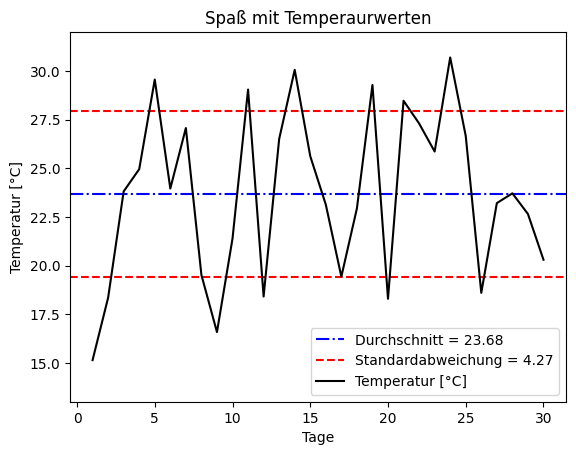

In [6]:
# --- Datenanalyse und Visualisierung mit Pandas, NumPy und Matplotlib

# Import benötigter Bibiliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Erstelle ein Pandas-DataFrame mit zufälligen Temperaturen
daten = pd.DataFrame({
    'Index': range(1, 31),
    'Values': np.random.uniform(15, 31, 30)
})

# Berechnungen mit NumPy
Durchschnitt = np.mean(daten['Values'])
Standardabweichung = np.std(daten['Values'])
Varianz = np.var(daten['Values'])

# Zeige die statistischen Werte an
plt.axhline(Durchschnitt, color='b', linestyle='-.', label=f'Durchschnitt = {Durchschnitt:.2f}')
plt.axhline(Durchschnitt + Standardabweichung, color='r', linestyle='dashed', label=f'Standardabweichung = {Standardabweichung:.2f}')
plt.axhline(Durchschnitt - Standardabweichung, color='r', linestyle='dashed')
    # plt.axhline(Varianz, color='g', linestyle = ':', label=f'Varianz = {Varianz:.2f}')

# Zeichne das Liniendiagramm
plt.plot(daten['Index'], daten['Values'], color = 'black', linestyle='-', label='Temperatur [°C]')
plt.xlabel('Tage')
plt.ylabel('Temperatur [°C]')
plt.title('Spaß mit Temperaurwerten')
plt.ylim(13, 32)
plt.legend()
plt.show()

### Interessanter Zusammenhang

Die Formel für die Berechnung der Varianz $ \sigma^2 $ einer Stichprobe lautet:
$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
$$
Dabei ist:
- $ \sigma^2 $ die Varianz,
- $ n $ die Anzahl der Datenpunkte,
- $ x_i $ der i-te Datenpunkt,
- $ \mu $ der Mittelwert der Datenpunkte.

Mit anderen Worten: "Die Varianz ist der Mittelwert der **quadratischen Abweichungen** aller Datenpunkte zum Datendurchschnitt". Dies erinnert in Punkto "quadratische Abweichung" an die lineare und polynomielle Regression, die allerdings nicht mit der Varianz als solche arbeiten.

### 3. Aufgabe: Auswerten von Daten

Die Numpy Befehle zur Berechnung des Durchschnitts, der Standardabweichung und der Varianz sind 3 von vielen Berechnungsmethoden, die in Numpy bereits vordefinierte und verfügbar sind. Etwas "exotischere" Berechungen und Datenabfragen kann man selbst in Python programmieren.

Nutzen Sie wieder einen Temperaturdatensatz wie oben. Bestimmen Sie - mit oder ohne Hilfe von existierenden Numpy Funktionen - folgendes:
1.  Die niedrigste und die höchste Temperatur im Datensatz.
2.  Die Durchschnittstemperatur, und für jeden Tag die Abweichung vom Durchschnitt:<br> <!-- br oder 2 Leerzeichen -->
    a) absolut: *TempAbweichungAbs = Temp - Durchschnitt*  
    b) relativ: *TempAbweichungRel = (Temp / Durchschnitt) - 1*
3.  Zählen Sie die Anzahl der Tage, an denen die Temperatur über 21°C lag.
4.  Rechnen Sie die gegebenen Temperaturwerte um in Fahrenheit.

Die Ergebnisse der Punkte 1, 2a und 4 können der Visualisierung hinzugefügt werden.

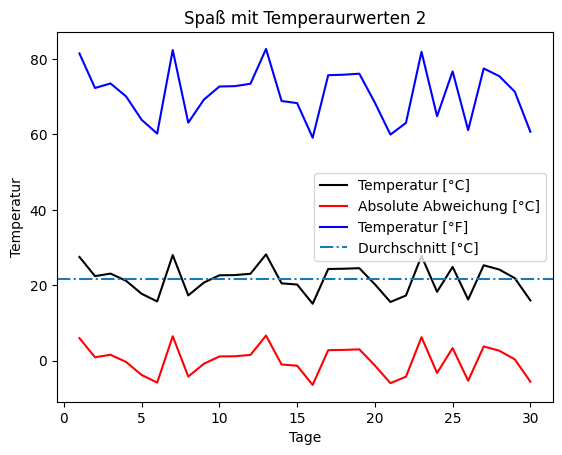

In [17]:
# --- Auswerten von Daten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Erstelle ein Pandas-DataFrame mit zufälligen Temperaturen
daten = pd.DataFrame({
    'Tage': range(1, 31),
    'Celsius': np.random.uniform(15, 30, 30)
})

# 1. Höchste und niedrigste Temperatur
min = daten['Celsius'].min()
max = daten['Celsius'].max()

# 2. Durchschnittstemperatur und Abweichungen
Durchschnitt = daten['Celsius'].mean()

##2.a) absolute Temperaturabweichung
daten['Absolut'] = daten['Celsius'] - Durchschnitt

##2.b) relative Temperaturabweichung
daten['Relativ'] = (daten['Celsius']/Durchschnitt) - 1 

# 3. Warme Tage zählen
warm = 0
for element in daten['Celsius']:
    if element > 21:
        warm += 1

# 4. Temperaturen in Fahrenheit umrechnen
daten['Fahrenheit'] = daten['Celsius']*1.8 + 32

# 5. Visualisierung
plt.plot(daten['Tage'], daten['Celsius'], color = 'black', linestyle='-', label='Temperatur [°C]')
plt.plot(daten['Tage'], daten['Absolut'], color = 'red', linestyle='-', label='Absolute Abweichung [°C]')
plt.plot(daten['Tage'], daten['Fahrenheit'], color = 'blue', linestyle='-', label='Temperatur [°F]')
plt.axhline(Durchschnitt, linestyle='-.', label = 'Durchschnitt [°C]')
plt.xlabel('Tage')
plt.ylabel('Temperatur')
plt.title('Spaß mit Temperaurwerten 2')
plt.legend()
plt.show()



### Der Median

Neben dem Mittelwert gibt es noch eine weiter Kennzahl, die herangezogen werden kann, um die "zentrale Lage" von Daten zu beschreiben: Der *Median*. Während der Mittelwert die Summe aller Werte durch die Anzahl der Werte teilt, ist der Median der mittlere Wert einer geordneten Datenreihe.

Beispiel: Sieben unsortierte Messwerte 4, 1, 15, 2, 4, 5, 4 werden nach Größe sortiert: 1, 2, 4, 4, 4, 5, 15. Der Median  ist der Wert an der mittleren Stelle, also 4. Wenn im Beispiel eine 4 durch einen Ausreißer 46 ersetzt wird, ändert sich der Median nicht: 1, 2, 4, 4, 5, 15, 46. Das arithmetische Mittel hingegen springt von 5 auf 11.



### 4. Aufgabe

Der Median kann auf folgende Weise bestimmt werden:
1. Alle Werte werden (aufsteigend) geordnet.
2. Wenn die Anzahl der Werte ungerade ist, ist die mittlere Zahl der Median.
3. Wenn die Anzahl der Werte gerade ist, wird der Median meist als arithmetisches Mittel der beiden mittleren Zahlen definiert, die dann Unter- und Obermedian heißen.

Implementieren Sie die Berechung des Medians von einem Numpy Array als **Funktion** in Python. Die Funktion soll ein array übergeben bekommen, und die obigen 3 Schritte zur Bestimmung des Medians durchführen. Der berechnete Median soll von der Funktion zurückgegeben werden. Benutzen Sie eingebaute Numpy Funktionen zur Sortierung eines Arrays. 

*Hinweis: Numpy stellt (natürlich) bereits eine Funktion zur Verfügung, die den Median eines arrays berechnet. Zum Zwecke des Verständnisses von Median und  Python-Programmiergrundlagen ist  eine Implementierung wie in der Aufgabenstellung beschrieben sicherlich förderlich.*

In [ ]:

# Funktion berechneMedian

# Hauptprogramm



### 5. Aufgabe - Vergleich von Sensordaten zur Fehleranalyse

In dieser Aufgabe geht es um den Vergleich der Fehlerraten von zwei Luftqualitätssensoren, **Sensor A** und **Sensor B**. 

Erstellen Sie zwei Arrays, die die unten stehenden Fehlerraten von Sensor A und Sensor B für 10 unterschiedliche Testmessungen enthalten. Berechnen Sie für beide Sensoren die statistischen Kennwerte 
   - Durchschnittsfehler
   - Maximaler Fehler
   - Median
   
Visualisieren Sie die Fehlerraten beider Sensoren und geben sie die berechneten statistischen KEnnwerte aus.
Welche Rückschlüsse geben die Werte über die Sensoreigenschaften?

| Index | Sensor A | Sensor B |
|-------|----------|----------|
| 0     | 1.2      | 1.5      |
| 1     | 1.8      | 1.4      |
| 2     | 1.9      | 2.3      |
| 3     | 1.0      | 1.7      |
| 4     | 3.5      | 2.8      |
| 5     | 2.0      | 1.9      |
| 6     | 2.8      | 2.9      |
| 7     | 1.5      | 2.1      |
| 8     | 2.3      | 2.6      |
| 9     | 3.0      | 2.8      |


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datensätze als arrays


# Berechnungen

# Ausgabe der Statistiken

# Visualisierung

